# 주제: 문자를 읽을 수 있는 딥러닝 (OCR)

## 데이터
20장 이미지(영어 10장, 한글 10장)

## 목표
1. 기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부 기술.  
2. 앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고, 평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명
3. 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론 도출 

## Step1. 검증용 데이터셋 준비

내가 기획하는 서비스는 책의 사진을 찍으면 OCR 기술을 활용하여 책의 제목을 추출하는 것이다.  
책의 제목을 OCR 기술로 추출한 다음에는 자동으로 도서가 검색될 것이다.  
검색 사이트로는 구글, 네이버, 다음, 교보문고, 알라딘, yes24 등이 될 것이다.  
검색 사이트와의 연결은 이 프로젝트에서 진행되지 않을 것이고 나중에 추가로 해야 한다.  
이 서비스는 책과 관련된 모든 기업과 개인이 사용할 수 있으며 사용자가 원하는 방식에 맞게 변경가능하다.  

사용할 데이터는 한글로 된 도서 사진 10권과 영어로 된 도서 사진 10권이다.  
영어 도서 사진은 저작권법에 걸리지 않은 사이트를 통해 얻은 사진이지만 한글은 구글링을 통해 얻은 사진이다.  


저작권법에 걸리지 않도록 사진을 사용할 수 있는 사이트는 다음과 같다.  
1. Unsplash (https://unsplash.com)  
2. Pixabay (https://pixabay.com)  
3. Pexels (https://www.pexels.com)  
4. Burst by Shopify (https://burst.shopify.com)  
5. Freepik (https://www.freepik.com)  
6. Wikimedia Commons (https://commons.wikimedia.org)  

- 예시 사진
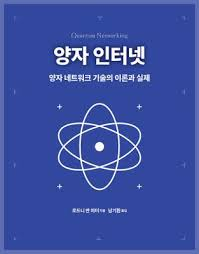


## Step2. keras-ocr, Tesseract로 테스트 진행(+ Google OCR API)

### (1) keras-ocr

In [5]:
import keras_ocr
import pytesseract
import matplotlib.pyplot as plt
print(keras_ocr.__version__)
print(pytesseract.__version__)

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드
pipeline = keras_ocr.pipeline.Pipeline()

0.8.8
0.3.8
Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [15]:
image_urls = [
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/1.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/10.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/2.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/5.png',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/9.jpg',    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

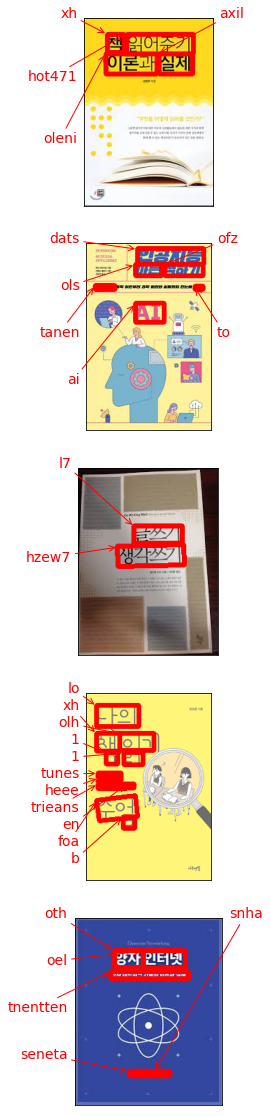

In [16]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

-> karas_ocr은 한글을 지원하지 않는다. 따라서 글자 recogzation은 잘 되었지만 텍스트로의 변경이 잘 되지 않는 것을 확인할 수 있다. 

In [17]:
image_urls = [
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/01.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/02.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/03.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/04.jpg',
    os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/05.jpg',    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

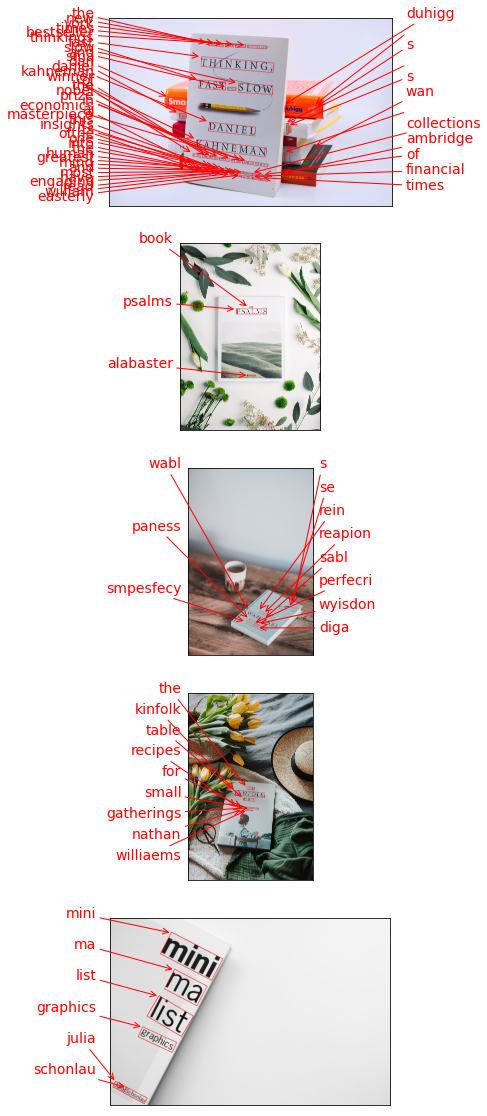

In [18]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

-> keras_ocr 기술은 아주 작은 단어까지 세세하게 인지하는 것을 확인할 수 있다.

### (2) Tesseract

In [31]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample01.jpg', output_path='./output', num = 3):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(num)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [32]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [33]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/1.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/project/first-repository/Data/ocr_project/000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/003.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/004.png


In [34]:
# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

-\\ 0 0 >3} ->》>》>6}~ . 【}》ㅇㄴ%%ㅅㅅ . ㄴ싸




\ 0 르르 이 릭른은을 압워으으으, 의 *, 은으아

Done


-> 이미지로부터 crop된 부분이 잘 잘려지지 않은 것을 알 수 있다. 
또한 추출된 단어들도 한글이라고 보기에는 어려운 이해하기 어려운 글자들로 되어있다.
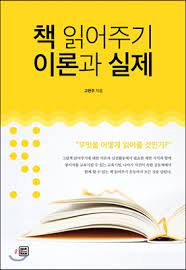

In [37]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/5.png'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 4)

/aiffel/aiffel/project/first-repository/Data/ocr_project/0000.png


In [38]:
# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

0

Done


-> 이미지가 손글시로 되어있는 탓인지 아예 글자가 인식이 안되는 경우도 있다. 
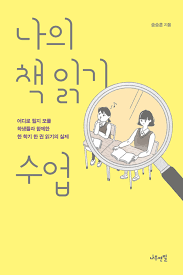

In [39]:
def crop_word_regions(image_path='./images/sample01.jpg', output_path='./output', num = 3):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(num)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [40]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [41]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/01.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 5)

/aiffel/aiffel/project/first-repository/Data/ocr_project/00000.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00001.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00002.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00003.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00004.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00005.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00006.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00007.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00008.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00009.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00010.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00011.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00012.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00013.png
/aiffel/aiffel/project/first-repository/Data/ocr_project/00014

In [42]:
# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)

02700

Ｌ

/수 0 17

21277

17244 <

00015 8

] 버


' 가 |

으나

즈

~ 03

| - 그

[4]

아0101606

ㆍ

10618

116

[116

14172

1118 18

0116 아 타16

21 02[6아

01101

1110

02}

＊

]

11110

1! 1136

"620 ”

~

41707 /

|

84


Done


-> 영어로 된 것 중에서도 글자가 세세하게 많은 것은 굉장히 많은 단어들을 추출하는 것을 알 수 있다. 
정확성은 떨어지지만 한글보다는 잘 표현되는 것 같다. 

In [43]:
work_dir = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project'
img_file_path = work_dir + '/05.jpg'   #테스트용 이미지 경로 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir, 6)

/aiffel/aiffel/project/first-repository/Data/ocr_project/000000.png


In [44]:
# crop_word_regions에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트 출력
recognize_images(cropped_image_path_list)


Done


-> 영어로 된 사진도 잘 인식이 안되는 경우도 있었다. 

### (3) Google OCR API

In [12]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [13]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야함
# 클라우드 환경에서는 무시해도 괜찮다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/2.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

total 180384
-rw-r--r-- 1 root root     21950 Apr 28 02:22  035420.KS.csv
-rw-r--r-- 1 root root    842150 May  8 05:33 '[10th_DeepML].ipynb'
-rw-r--r-- 1 root root     65649 Mar 27 12:01  머신러닝_기초_노드10_프로젝트성능_향상_Tip.ipynb
-rw-r--r-- 1 root root      3474 May 10 03:54 '[11th_CV_basic01].ipynb'
-rw-r--r-- 1 root root    370983 May 21 17:09 '[12th_CV_basic02].ipynb'
-rw-r--r-- 1 root root   1435419 May 23 09:31 '[13th_GD_CV01].ipynb'
-rw-r--r-- 1 root root   3721083 May 26 03:37 '[14th_GD_CV02].ipynb'
-rw-r--r-- 1 root root    255660 May 31 10:39 '[15th_GD_NLP01].ipynb'
-rw-r--r-- 1 root root   3866121 Jun 10 16:56 '[16th_GD_CV03].ipynb'
-rw-r--r-- 1 root root    190240 Jun  7 10:04 '[17th_GD_NLP02].ipynb'
-rw-r--r-- 1 root root      4107 Jun 15 15:16 '[18th_GD_CV04].ipynb'
-rw-r--r-- 1 root root    154979 Jun 13 08:00 '[19th_GD_NLP03].ipynb'
-rw-r--r-- 1 root root    426054 Jun 19 15:47 '[20th_GD_CV05].ipynb'
-rw-r--r-- 1 root root     75022 Apr  7 03:08  3rd_Predict_Airbnb_Price-Copy1.i

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


DefaultCredentialsError: File /aiffel/aiffel/ocr_python/my_google_api_key.json was not found.

-> 한글로된 이미지 분석

In [ ]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/9.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

-> 한글로된 이미지 분석

In [ ]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/09.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

-> 영어로 된 이미지 분석

In [ ]:
# 입력 이미지 경로
path = os.getenv('HOME')+'/aiffel/project/first-repository/Data/ocr_project/08.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출
detect_text(path)

-> 영어로 된 이미지 분석

## Step3. 테스트 결과 정리

|모델명|한글|영어|
|------|---|---|
|keras-ocr|테스트2|테스트3|
|Tesseract|테스트2|테스트3|
|Google OCR API|테스트2|테스트3|


## Step4. 결과 분석과 결론 제시

### (1) 구현하고자 하는 서비스의 목적과 내용
책의 제목, 더 나아가 지은이와 출판사를 OCR 기술을 활용하여 텍스트를 인식한다.   
인식한 텍스트는 도서 검색 혹은 등록에 활용될 수 있다.  
이는 눈이 잘 보이지 않는 사람, 혹은 문맹인 사람, 다른 나라의 언어를 모르는 사람들에게 유용하다.  

### (2) 평가 기준
텍스트의 위치와 텍스트의 내용을 정확히 읽어내는 것은 어떠한 OCR 기술에도 필요한 목적일 것이다.  
나는 여기서 개인적인 의견을 추가하자면 여러 가지의 글자들을 인식하기보다는 적은 단어들을 인식해도 정확한 글자를 읽어내는 것이 제일 중요하다. 
또한 도서 검색을 할 땐, 출판사까지는 나오지 않더라도 큰 제목을 잘 인식하는 기술이 더 중요해질 것이고 도서 등록을 할 땐 작은 글씨까지 인식이 되는 것이 도서 검색할 때보단 중요해질 것이다.

### (3) 결론
위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

# 프로젝트
1. 현시점 해야할 일 테서렉트 정리, 
2. 구글 api 인증키 받아서 코드 오류 수정하고 
3. 분석하기 
4. 마무리짓기

## 배운점
1. 이미 학습된 모델을 이용하여도 결과가 잘 나올 줄 알았는데 사진의 특성에 따라 그 기능이 천차만별이라는 것을 느꼈다. 아직 OCR 분야에 대해 더욱 발전이 필요한 것으로 보인다.  
2. 다양한 모델을 통하여 내 환경에 맞게 테스트를 진행하는 방법에 익숙해진 것 같다. 
3. 서비스를 기획하고, 목적과 기준을 제시하고, 평가하는 순서를 통해 더 창의적인 개발자가 된 기분이었다. 

## 아쉬운점
1. keras_ocr도 한글 폰트를 다운받아서 사용하면 한글 텍스트를 이용할 수 있다는 것을 뒤늦게 배웠다. 이도 추후에 해보면 좋을 것 같다.

## 종합의견
처음에 OCR 기술을 접할 때는 어려워 보였는데 막상 시도해보니 생각보다 간단하고 재밌는 과정이어서 놀랐다. 역시 여러 번 반복하여 익숙해지면 못할 일이 없다는 생긱이 든다. 앞으로 OCR 분야가 해야 하는 일, 할 수 있는 일이 많기 때문에 이와 관련된 연구를 해봐도 좋을 것 같다. 한국어로 된 모델을 만들기 위해 CRNN을 이용하는 글을 따라서 시도해보아야겠다.  

# Reference 

